In [64]:
# 質的応答に対する回帰モデル

# 16, 17の線形回帰分析は(-∞, ∞)の実数値をとる応答に正規性を仮定した分析手法であった
# したがって応答が連続値であっても非負値に限定される場合や、応答が離散値の場合などは、線形回帰分析は適切ではない
# 後者の応答が離散値である場合のモデリングについては、一般化線形モデルの理論が基本となる
# 一般化線形モデルの理論では、指数型分布族の属する様々な統計モデルを統一的に扱うことができる
# 応用上、特に重要な統計モデルは、応答が2個の値をとる場合のロジスティック回帰モデルやプロビットモデル、
# 応答が計数値をとる場合のポアソン回帰モデルなどである。

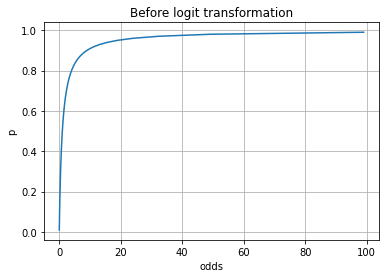

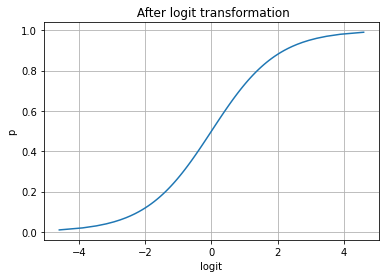

In [65]:
# ロジスティック回帰モデル

# 2値応答(Ex, Yes/No, 表/裏)に対応する統計モデルを考える。
# 応答を表す確率変数Yが{0,1}の2値応答であるとき、その期待値をπ=E[Y]とし、0<π<1を仮定する
# Yは生起確率πのベルヌーイ分布に従うと仮定する。
# このとき、πをp個の説明変数x1,x2,..,xnで回帰する統計モデルとして、構造
# log(π/(1-π)) = B0+B1*x1+..+Bn*xn を仮定するモデルが、「ロジスティック回帰モデル」である
# 上記の左辺の変換：x -> log(π/(1-π)) は「ロジット変換」とよばれ、
# その逆変換：x -> e**x/(1+e**x)を「ロジスティック変換」とよぶ。
# つまり、母数の線形結合のロジスティック変換で期待値母数πを回帰するのがロジスティック回帰モデルである
# これはまた、リンク関数がロジット関数で誤差構造がベルヌーイ分布である一般化線形モデルに対応する。

# ロジット変換を実行
import numpy as np
import matplotlib.pyplot as plt

p = np.arange(0.01, 1, 0.01) # 確率値
odds_val = p/(1-p)
plt.title("Before logit transformation")
plt.xlabel("odds")
plt.ylabel("p")
plt.plot(odds_val, p)
plt.grid()
plt.show()

logit_val = np.log(p/(1-p))
plt.title(" After logit transformation")
plt.xlabel("logit")
plt.ylabel("p")
plt.plot(logit_val, p)
plt.grid()
plt.show()

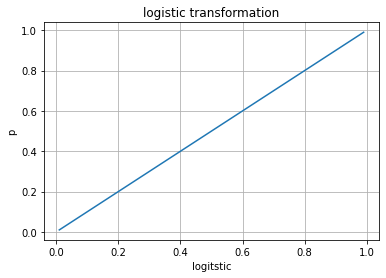

In [66]:
# ロジスティック変換を実行
logistic_val = np.exp(logit_val)/(1+np.exp(logit_val))
plt.title("logistic transformation")
plt.xlabel("logitstic")
plt.ylabel("p")
plt.plot(logistic_val, p)
plt.grid()
plt.show() # 確率値に変換することを確認

In [67]:
# irisデータセットでロジスティック回帰を実行
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# データセットを取得
iris = load_iris()
iris_df = pd.DataFrame(
        iris.data,
        columns=iris.feature_names,
    )
iris_df["species"] = iris.target

# 1:versicolorかどうかを判定するためのカラムを追加
iris_df['is_versicolor'] = iris_df['species'].apply(lambda x: 1 if x==1 else 0)

# 訓練データと検証データに分割
X = iris_df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
Y = iris_df['is_versicolor']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# 学習を実行
lr = LogisticRegression()
lr.fit(X_train, Y_train)
print(f"coefficient:{lr.coef_}")
print(f"intercept:{lr.intercept_}")

# 推測を実行(ロジスティック変換後の確率値が0.5以上であれば1、以下であれば0に分類)
Y_pred = lr.predict(X_test)

# 各スコアを確認
print(f"confusion matrix:\n{confusion_matrix(y_true=Y_test, y_pred=Y_pred)}")
print(f"accuracy:{accuracy_score(y_true=Y_test, y_pred=Y_pred):.3f}")
print(f"precision:{precision_score(y_true=Y_test, y_pred=Y_pred):.3f}")
print(f"recall:{recall_score(y_true=Y_test, y_pred=Y_pred):.3f}")
print(f"f1 score:{f1_score(y_true=Y_test, y_pred=Y_pred):.3f}")

coefficient:[[-0.22275981 -1.81087669  0.564339   -0.99095423]]
intercept:[4.90323519]
confusion matrix:
[[26  1]
 [15  3]]
accuracy:0.644
precision:0.750
recall:0.167
f1 score:0.273


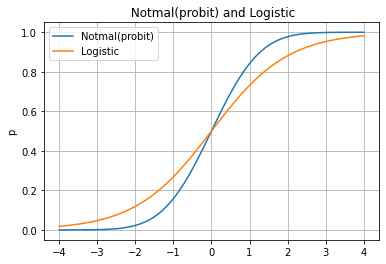

In [68]:
# プロビットモデル

# 2値応答に対応するもう一つ代表的なモデルは、標準正規分布の累積分布関数Φを用いて
# π = Φ*(B0+B1*x1+..+Bp*xp) という構造を仮定するモデルである。
# Φ(x)の逆変換は「プロビット変換」と呼ばれるから、このモデルは、
# プロビット関数Φ**(-1):(0:1)->(-∞,∞) をリンク関数とする一般化線形モデルであり、
# 「プロビットモデル」とよばれる

# ロジスティクス分布と標準正規分布(プロビット)の比較
from scipy.stats import logistic, norm 

x = np.linspace(-4,4,100)
probit_val = norm.cdf(x)
logit_val = logistic.cdf(x)
plt.title("Notmal(probit) and Logistic")
plt.ylabel("p")
plt.plot(x, probit_val, label='Notmal(probit)')
plt.plot(x, logit_val, label='Logistic')
plt.legend()
plt.grid()
plt.show()


In [69]:
# irisデータセットでプロビットモデルを実装
import statsmodels.api as sm

probit_model=sm.Probit(Y_train, X_train)
result = probit_model.fit()
print(result.summary())
Y_pred = result.predict(X_test)
Y_pred = Y_pred.apply(lambda x: 1 if x >= 0.5 else 0) # 0.5以上のとき1、それ以下を0とする

# 各スコアを確認
print(f"confusion matrix:\n{confusion_matrix(y_true=Y_test, y_pred=Y_pred)}")
print(f"accuracy:{accuracy_score(y_true=Y_test, y_pred=Y_pred):.3f}")
print(f"precision:{precision_score(y_true=Y_test, y_pred=Y_pred):.3f}")
print(f"recall:{recall_score(y_true=Y_test, y_pred=Y_pred):.3f}")
print(f"f1 score:{f1_score(y_true=Y_test, y_pred=Y_pred):.3f}")

Optimization terminated successfully.
         Current function value: 0.512625
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:          is_versicolor   No. Observations:                  105
Model:                         Probit   Df Residuals:                      101
Method:                           MLE   Df Model:                            3
Date:                Sat, 17 Dec 2022   Pseudo R-squ.:                  0.1663
Time:                        16:36:53   Log-Likelihood:                -53.826
converged:                       True   LL-Null:                       -64.559
Covariance Type:            nonrobust   LLR p-value:                 8.423e-05
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
sepal length (cm)     0.3703      0.384      0.965      0.335      -0.382       1.122
sepal wi

In [75]:
# ポアソン回帰モデル

# 応答が計数値である場合の統計モデルを考える。
# 応答を表す確率変数Yが係数値であるとき、その期待値をπ=E[Y]とし、π>0を仮定する
# また、Yは平均μのポアソン分布に従うと仮定する。このとき、πをpこの説明変数x1,..,xpで
# 回帰する統計モデルとして、構造 logπ = B0+B1*x1+..+Bp*xp を仮定するモデルが「ポアソン回帰モデル」である。
# 母数πに対する「対数線形モデル」あるいは「ポアソン対数線形モデル」と呼ぶこともある
# 平均πのポアソン分布は、二項分布Bin(n,p)でnp=πで固定したもとで、n->∞, p->0の極限での分布であり、
# 稀な事象の生起回数の分布としてよく使われる。
# ポアソン回帰モデルでは、説明変数xjの値を単位量増やしたとき、期待値πはe**Bj倍される

import seaborn as sns
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import r2_score

# 車の事故データを取得
crash_df = sns.load_dataset('car_crashes')
crash_df.head()

# 訓練データと検証データに分割
X = crash_df[["speeding", "alcohol", "not_distracted", "no_previous"]]
Y = crash_df['total']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# 学習を実行
pr = PoissonRegressor()
pr.fit(X_train, Y_train)
print(f"coefficient:{pr.coef_}")
print(f"intercept:{pr.intercept_}")
print(f"score:{pr.score(X_test, Y_test)}")

# 推測を実行
Y_pred = pr.predict(X_test)
print(f"Y predict:{np.round(Y_pred, 1).tolist()}")
print(f"Y test:{Y_test.to_list()}")
print(f"R2:{round(r2_score(Y_test, Y_pred),3)}")

coefficient:[0.00441539 0.01671894 0.00800988 0.05334221]
intercept:1.7652487902407008
score:0.9231365212613976
Y predict:[11.4, 17.4, 15.4, 12.6, 19.3, 15.7, 14.1, 11.6, 21.6, 12.1, 15.4]
Y test:[11.6, 17.5, 15.6, 14.1, 18.6, 14.7, 13.6, 12.3, 21.4, 12.0, 16.8]
R2:0.929


score:0.416652430694172
R2:0.432


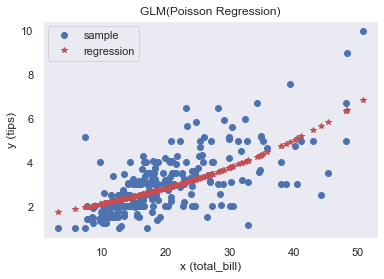

In [90]:
# 一般化線形モデル

# これまでのロジスティック回帰モデル、プロビットモデル、ポアソン回帰モデルは、全て「一般化線形モデル」として扱うことができる
# 応答を表す確率変数Yの期待値をπ=E[Y]とする。Yの確率分布として、「指数型分布族」を仮定する。
# 一般化線形モデルは、期待値母数πのなめらかな変換g(.)を考え、これが説明変数の線形結合として
# g(π) = B0+B1*x1+..+Bp*xp と表されることを仮定する。関数gを「リンク関数」とよぶ。
# まとめると、一般化線形モデルの構成要素は、1.Yの確率分布、2.リンク関数、3.線形予測子 となる
# また、これまで記載した回帰モデルは以下で構成される。
# ロジスティック回帰モデル：1.ベルヌーイ分布、2.ロジット変換
# プロビットモデル：1.ベルヌーイ分布、2.プロビット変換
# ポアソン回帰：1.ポアソン分布、2.対数関数

# tipsデータで一般化線形モデルを実行
from sklearn.linear_model import TweedieRegressor

tips_df = sns.load_dataset("tips")

# dfからnumpy.ndarrayに変換
y = tips_df['tip'].values          # 目的変数：y = [y0, y1, y2, ... yi]
x = tips_df['total_bill'].values   # 説明変数：x = [x0, x1, x2, ... xi]

# [x0, x1, x2,..] から [[x0], [x1], [x2]] に変換
x = x.reshape(len(X),1)

# データ分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# ポアソン回帰を設定
reg = TweedieRegressor(
    power=1,  # 確率分布：ポアソン分布を仮定
    link='log',  # リンク関数：対数関数
)

# モデル生成
reg.fit(x_train, y_train)
print(f"score:{reg.score(x_test, y_test)}")

# 推測の実行
y_hat = reg.predict(x_test)
print(f"R2:{round(r2_score(y_test, y_hat),3)}")

# 推測結果の可視化
plt.title("GLM(Poisson Regression)")
plt.plot(x, y, "o", label="sample")
plt.plot(x, reg.predict(X), "*", color="r", label="regression")
plt.xlabel('x (total_bill)')
plt.ylabel('y (tips)')
plt.grid()
plt.legend()
plt.show()